## Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

In [42]:
df = pd.read_csv('QueryResults2.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [43]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [44]:
df.tail()

,DATE,TAG,POSTS
2155,2021-07-01 00:00:00,r,4864
2156,2021-07-01 00:00:00,ruby,522
2157,2021-07-01 00:00:00,javascript,18549
2158,2021-07-01 00:00:00,swift,2417
2159,2021-07-01 00:00:00,python,25918


In [45]:
df.shape

(2160, 3)

In [46]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,156,156
c,156,156
c#,157,157
c++,156,156
delphi,156,156
go,141,141
java,156,156
javascript,156,156
perl,156,156


## Data Cleaning

In [47]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [48]:
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,85
4,2008-08-01,python,124


## Data Manipulation

In [49]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [50]:
reshaped_df.shape

(157, 14)

In [51]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,509.0,164.0,14.0,NaN,222.0,163.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1648.0,754.0,105.0,NaN,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1153.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


In [52]:
reshaped_df.count() 

TAG
assembly      156
c             156
c#            157
c++           156
delphi        156
go            141
java          156
javascript    156
perl          156
php           156
python        156
r             154
ruby          156
swift         148
dtype: int64

In [53]:
reshaped_df.fillna(0, inplace=True)

In [54]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,509.0,164.0,14.0,0.0,222.0,163.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1648.0,754.0,105.0,0.0,1136.0,639.0,131.0,480.0,540.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1153.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,503.0,452.0,1.0,159.0,0.0


In [55]:
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib

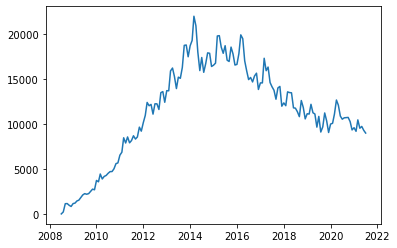

In [56]:
plt.plot(reshaped_df.index, reshaped_df['java'])

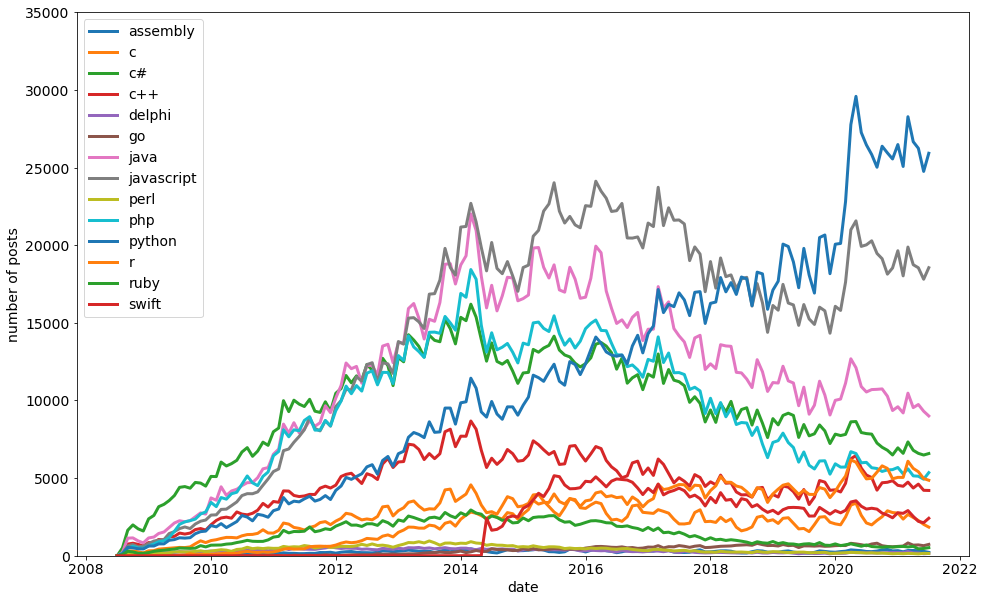

In [57]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("date", fontsize=14)
plt.ylabel("number of posts", fontsize=14)
plt.ylim(0,35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], linewidth=3, label=reshaped_df[column].name)
    
plt.legend(fontsize=14)
